In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from bubbly.bubbly import bubbleplot
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel
import plotly.express as px
import plotly.io as pio
import nbformat

In [2]:
# import lda model
n_topics = 50
n_passes = 5
model_path = f"data/lda/{n_topics}_topics/{n_passes}/model.model"
lda_model = LdaModel.load(model_path)

In [3]:
def print_topics(model, n_topics=n_topics, k_words=5):
    '''
    print all n topics of the lda model 
    '''
    for idx, topic in model.show_topics(formatted=False, num_topics=n_topics):
        label = ", ".join([word for word, prob in topic[:k_words]])
        print(f"Topic {idx}: {label}")

In [4]:
print_topics(lda_model)

Topic 0: social, employment, job, economic, people
Topic 1: fishing, fishery, sea, fish, stock
Topic 2: right, human, freedom, democracy, law
Topic 3: development, policy, strategy, cohesion, support
Topic 4: small, business, medium, sme, company
Topic 5: energy, gas, renewable, price, nuclear
Topic 6: security, eu, policy, union, foreign
Topic 7: woman, violence, gender, equality, right
Topic 8: policy, interest, people, state, union
Topic 9: law, convention, court, state, legal
Topic 10: state, member, directive, standard, legislation
Topic 11: people, europe, year, mr, let
Topic 12: market, tax, company, single, competition
Topic 13: program, research, innovation, technology, programme
Topic 14: sector, industry, market, production, price
Topic 15: disaster, damage, safety, road, port
Topic 16: human, victim, trafficking, illegal, abuse
Topic 17: child, education, people, young, school
Topic 18: corruption, scandal, game, investigation, venezuela
Topic 19: food, animal, health, prod

In [5]:
topic_list = []
for idx, topic in lda_model.show_topics(formatted=False, num_topics=n_topics):
    label = ", ".join([word for word, prob in topic[:3]])
    topic_list.append(label)

In [6]:
df = pd.read_csv("data/df_topics_temp.csv")

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,speaker,text,party,date,agenda,speechnumber,procedure_ID,partyfacts_ID,...,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,0,574117,Hannes Swoboda,"(DE) Madam President, if you continue to be th...",PSE,1999-07-20,5. Election of Quaestors1999-07-20,4,,6399.0,...,0.002859,0.002859,0.002859,0.002859,0.002859,0.002859,0.002859,0.002859,0.002859,0.002859
1,1,574084,Brian Crowley,"Mr President, I should like to thank you for g...",UEN,1999-07-20,1. Resumption of the session1999-07-20,2,,8760.0,...,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156,0.000156
2,3,574089,Graham Watson,"Mr President, before moving to the election of...",ELDR,1999-07-20,2. Oldest Member1999-07-20,4,,6401.0,...,0.000628,0.000628,0.000628,0.000628,0.038582,0.034532,0.000628,0.144637,0.000628,0.000628
3,4,574092,Francis Wurtz,"(FR) Mr President, for the first time in ten y...",GUE/NGL,1999-07-20,3. Election of the President1999-07-20,2,,6402.0,...,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.080556,0.000625,0.000625,0.000625
4,5,574094,Francis Wurtz,"(FR) I agree, Mr President, but as you know, h...",GUE/NGL,1999-07-20,3. Election of the President1999-07-20,4,,6402.0,...,0.000371,0.000371,0.000371,0.022516,0.000371,0.000371,0.063076,0.000371,0.000371,0.000371


In [8]:
# print speeches with highest probability for a given topic
topic_id = 43
prob_col = f"topic_{topic_id}"
top_speeches = df.sort_values(by=prob_col, ascending=False).head(5)
for i, row in top_speeches.iterrows():
    print(f"Year: {row['year']} | Party block: {row['party_block']}")
    print(f"Topic probability: {row[prob_col]:.4f}")
    print(row["translatedText"], "\n")
    print("\n"+"-"*80+"\n")

Year: 2014 | Party block: christian_conservative
Topic probability: 0.8193
The creation of a single European railway area can no longer wait. It is necessary to increase the share of rail transport compared to road transport to reduce pollution and road traffic. Railways must become a reliable and attractive means of transport throughout Europe. Their liberalization must serve to relaunch the entire sector by making it more competitive and with increasingly higher quality services. 


--------------------------------------------------------------------------------

Year: 2012 | Party block: social_democratic
Topic probability: 0.6869
The construction of a safe, modern integrated railway network is one of the EU’s major priorities. Railways must become more competitive and offer high-quality, end-to-end services without being restricted by national borders. I voted in favour. 


--------------------------------------------------------------------------------

Year: 2014 | Party block: c

In [9]:
df.shape

(461949, 72)

In [10]:
# exclude all written speeches
df = df[df['written'] == True]
df.shape

(233926, 72)

In [11]:
# add new column, where for each row, the topic with the highest probability is selected
df['dominant_topic_id'] = df.loc[:, 'topic_0':'topic_49'].idxmax(axis=1)
df['dominant_topic'] = df['dominant_topic_id'].apply(lambda x: topic_list[int(x.split('_')[1])])

In [12]:
df.head()

,Unnamed: 0.1,Unnamed: 0,speaker,text,party,date,agenda,speechnumber,procedure_ID,partyfacts_ID,...,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,dominant_topic_id,dominant_topic
309,336,573477,Harlem Désir,(FR) The record levels of abstention at the Eu...,PSE,1999-09-15,9. Votes1999-09-15,30,,6399.0,...,0.000121,0.000121,0.045625,0.000121,0.018937,0.000121,0.000121,0.000121,topic_26,"europe, citizen, union"
311,338,573485,Marie-Noëlle Lienemann,(FR) The vote on the ratification of the Commi...,PSE,1999-09-15,9. Votes1999-09-15,38,,6399.0,...,0.000139,0.000139,0.082713,0.000139,0.000139,0.000139,0.000139,0.000139,topic_26,"europe, citizen, union"
312,339,573484,"Richard Fletcher-Vane, 2. Baron Inglewood",Over the winter of 1998/99 the European Parlia...,PPE-DE,1999-09-15,9. Votes1999-09-15,37,,6398.0,...,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,topic_27,"parliament, mr, committee"
313,340,573483,Ian Hudghton,My main consideration in passing judgement on ...,Greens/EFA,1999-09-15,9. Votes1999-09-15,36,,6403.0,...,0.000223,0.000223,0.071685,0.000223,0.000223,0.086596,0.000223,0.000223,topic_26,"europe, citizen, union"
314,341,573482,Gahrton and Schörling,(SV) In spite of the fact that some of the Com...,Greens/EFA,1999-09-15,9. Votes1999-09-15,35,,6403.0,...,0.000223,0.000223,0.056523,0.000223,0.000223,0.104640,0.000223,0.000223,topic_27,"parliament, mr, committee"


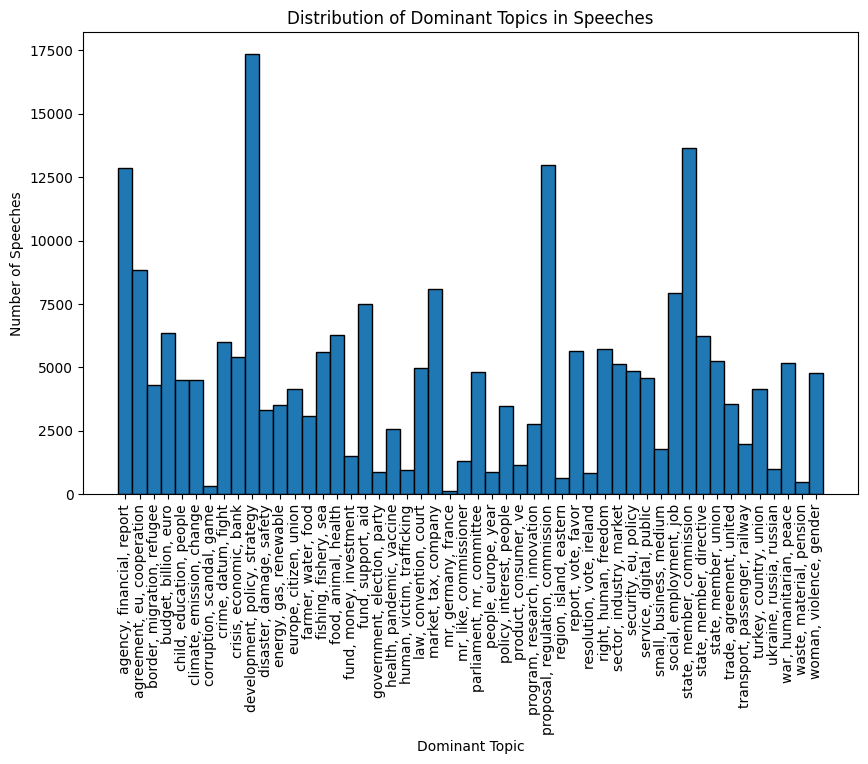

In [13]:
# histogram of dominant topics
plt.figure(figsize=(10,6))
plt.hist(df['dominant_topic'].sort_values(), bins=np.arange(-0.5, 50.5, 1), edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Dominant Topic')
plt.ylabel('Number of Speeches')
plt.title('Distribution of Dominant Topics in Speeches')
plt.show()

In [14]:
# rough left - right classification: should be replaced by chess data later - 1 left to 10 right
party_dict = {"PSE/S&D": 3,
              "PPE": 7,
                "ELDR/ALDE/Renew": 5,
                "Greens/EFA": 2,
                "ENF/ID": 9,
                "ECR": 8,
                "NGL/The Left": 1,
                "UEN" : 7,
                "EFD" : 8,
                "INDDEM/EDD": 7}
df['party_pos'] = df['party_adj'].map(party_dict)


In [15]:
df_dominant = df.groupby(['dominant_topic', 'year']).agg({
    'text': 'count',
    'party_pos': 'mean'
}).reset_index().rename(columns={'text': 'count', 'party_pos': 'avg_party_pos'})

# Calculate total speeches per year
year_totals = df_dominant.groupby('year')['count'].sum().reset_index()
year_totals.columns = ['year', 'total_count']

# Merge and calculate ratio
df_dominant = df_dominant.merge(year_totals, on='year')
df_dominant['ratio'] = df_dominant['count'] / df_dominant['total_count']

In [16]:
del df

In [17]:
# sanity check: make sure that for each year, the sum of ratios equals 1
check = df_dominant.groupby('year')['ratio'].sum().reset_index()
assert all(np.isclose(check['ratio'], 1.0)), "Ratios do not sum to 1 for all years!"

# sanity check: make sure that for each year, each topic has only one entry
check2 = df_dominant.groupby(['year', 'dominant_topic']).size().reset_index(name='counts')
assert all(check2['counts'] == 1), "There are duplicate entries for some year-topic combinations!"

In [18]:
df_dominant.head()

,dominant_topic,year,count,avg_party_pos,total_count,ratio
0,"agency, financial, report",1999,1,5.000000,189,0.005291
1,"agency, financial, report",2000,13,4.384615,1079,0.012048
2,"agency, financial, report",2001,10,3.800000,1038,0.009634
3,"agency, financial, report",2002,3,3.666667,1111,0.002700
4,"agency, financial, report",2003,3,5.000000,1589,0.001888


In [25]:
# create stacked area plot
fig = px.area(df_dominant, 
              x='year', 
              y='ratio', 
              color='dominant_topic',
              hover_data={'count': True, 'avg_party_pos': ':.2f'},
              labels={'ratio': 'Proportion of Speeches', 'year': 'Year', 'dominant_topic': 'Topic'},
              title='Topics discussed in the European Parliament from 1999 to 2024',
              subtitle='As identified by LDA topic modeling, expressed as proportions per year',
              range_y=[0,1]
              )



# display plot
fig.show()

In [ ]:
# bubble plot: did not work as well, prob. stick with area plot
# topic_y_positions = {topic: i for i, topic in enumerate(sorted(df_dominant['dominant_topic'].unique()))}
# df_dominant['y_pos'] = df_dominant['dominant_topic'].map(topic_y_positions)

# fig = px.scatter(
#     df_dominant,
#     x="avg_party_pos",
#     y="y_pos",
#     size="ratio",
#     color="dominant_topic",
#     animation_frame="year",
#     hover_name="dominant_topic",
#     size_max=80
# )

# fig.update_yaxes(
#     tickvals=list(topic_y_positions.values()),
#     ticktext=list(topic_y_positions.keys()),
#     visible=True
# )
# fig.update_layout(
#     title="Topic prominence by year",
#     xaxis_title="Average political position",
#     yaxis_title="Topics",
#     showlegend=True
# )

# pio.renderers.default = "browser"
# fig.show()
